# Sprint 機械学習スクラッチ 線形回帰

## 1.このSprintについて

### Sprintの目的
- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

### どのように学ぶか
- スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。



## 2.線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

**雛形**

`````
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

`````

## 【まとめ】最終的なコード
下記が最終的にFixしたコードは下記になり、全問題で共通になります。

In [1]:
# ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose, verbose_filter=1, q=0):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.verbose_filter = verbose_filter

        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        # 問題番号別の制御用
        self.q = q

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 引数チェック
        assert len(X) == len(y), "[ERROR] The number of rows of X and y are different."
        if np.all(X_val != None) or np.all(y_val != None):
            assert len(X_val) == len(y_val), "[ERROR] The number of rows of X_val and y_val are different."

        # インスタンス変数の設定
        X, y, X_val, y_val = self._set_variables(X, y, X_val, y_val)

        # メイン処理
        for i in range(self.iter):

            # ループ回数をインスタンス変数へ代入
            self.count = i
            
            # 問題1
            # 推定値(y_hypo)計算
            self.y_hypo = self._linear_hypothesis(X)
            
            # 問題2
            # 最急降下法実行して値を更新
            self.w, self.error = self._gradient_descent(X, y, self.y_hypo, self.n_samples)

            # 問題5
            # 損失関数
            self.loss[i] = self._loss_func(self.error, self.n_samples)

            # 問題7
            # 検証データの損失関数
            if np.all(X_val != None) and np.all(y_val != None):
                # 推定値(y_hypo)計算
                self.y_hypo_val = self._linear_hypothesis(X_val)

                # 最急降下法実行して値を更新
                _, self.error_val = self._gradient_descent(X_val, y_val, self.y_hypo_val, self.n_samples_val)

                # 損失関数
                self.val_loss[i] = self._loss_func(self.error_val, self.n_samples_val)

            if self.verbose and self.count % self.verbose_filter == 0:
                #verboseをTrueにした際は学習過程を出力
                print('[INFO] loop count =', self.count)
                print('[INFO] update_w\n', self.w)
            pass
        pass





    # インスタンス変数の設定
    def _set_variables(self, X, y, X_val, y_val):
        """
        必要なインスタンス変数を設定する。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            訓練データの説明変数
        y : ndarray, shape (n_samples, )
            訓練データの目的変数
        X_val : ndarray, shape (n_samples, n_features)
            検証データの説明変数
        y_val : ndarray, shape (n_samples, )
            検証データの目的変数

        Returns
        -------
        X : ndarray, shape (n_samples, n_features)
            訓練データの説明変数
        y : ndarray, shape (n_samples, )
            訓練データの目的変数
        X_val : ndarray, shape (n_samples, n_features)
            検証データの説明変数
        y_val : ndarray, shape (n_samples, )
            検証データの目的変数

        """
        
        # ループカウント用
        self.count = 0

        # トレーニングデータの形状
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]

        # テストデータの形状
        if np.all(X_val != None):
            self.n_samples_val = X_val.shape[0]
            self.n_features_val = X_val.shape[1]

        # no_bias=Falseのとき特徴量カラムを1列追加
        if not self.no_bias:
            print('[INFO] no_bias=False')

            # トレーニングデータの処理
            self.n_features += 1
            b = np.ones([self.n_samples, 1])
            X = np.concatenate([b, X], axis=1)

            # テストデータの処理
            if np.all(X_val != None):
                self.n_features_val += 1
                b = np.ones([self.n_samples_val, 1])
                X_val = np.concatenate([b, X_val], axis=1)

        # パラメータ初期値設定
        self.w = np.random.randn(self.n_features) + 0.1
#         self.w = np.full(self.n_features,2)  # テスト用に固定値代

        # 変数初期化
        self.y_hypo = 0
        self.error = 0
        self.y_hypo_val = 0
        self.error_val = 0

        return X, y, X_val, y_val



    # 問題1
    # 推定値計算の処理
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """

        y_hypo = X @ self.w.T

        # 課題提出用
        if self.q == 1 and self.count % self.verbose_filter == 0:
            print('Loop count :', self.count)
            print('仮定関数計算結果 :', y_hypo)

        return y_hypo



    # 問題2
    # 最急降下法の処理
    def _gradient_descent(self, X, y, y_hypo, n_samples):
        """
        最急降下法によりパラメータの更新値を求める

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            訓練データの説明変数
        y : ndarray, shape (n_samples, )
            訓練データの目的変数
        y_hypo : ndarray, shape (n_samples, )
            仮説関数によるyの推定値
        n_samples : int
            Xのサンプル数

        Returns
        -------
        update_w : ndarray, shape (n_features, )
            パラメータの更新値
        error : ndarray, shape (n_samples, )
            推定値と実測値の誤差

        """
        # 誤差の計算
        error = y_hypo - y
        error = error[:, np.newaxis]

        update_w = self.w - (self.lr * np.sum(error * X, axis=0) / n_samples)

        # 課題提出用
        if self.q == 2 and self.count % self.verbose_filter == 0:
            print('Loop count :', self.count)
            print('誤差 :\n', error)
            print('更新値 :', update_w)

        return update_w, error



    # 問題3
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.no_bias:
            b = np.ones([X.shape[0], 1])
            X = np.concatenate([b, X], axis=1)
        
        # 予測値を計算
        y_pred = self._linear_hypothesis(X)
        
        return y_pred


    # 問題5
    # 損失関数
    def _loss_func(self, error, n_samples):
        """
        損失関数

        Parameters
        ----------
        error : ndarray, shape (n_samples, )
            推定値と実測値の誤差
        n_samples : int
            サンプル数

        Returns
        -------
        loss : float
            損失関数によるloss
        """
        loss = np.sum(error**2) / (2*n_samples)
        
        return loss


## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。

**雛形**

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。



In [3]:
# テストデータ
x = np.array([[1, 5],
                [2, 8],
                [3, 9]])
y = np.arange(6, 9)

In [4]:
# 実行（バイアスあり）
# no_bias=False
slr = ScratchLinearRegression(num_iter=1, lr=0.01, no_bias=False, verbose=False, verbose_filter=1, q=1)
slr.fit(x, y)

[INFO] no_bias=False
Loop count : 0
仮定関数計算結果 : [ 6.31060126 10.14878017 11.46529397]


In [5]:
# 実行（バイアスなし）
# no_bias=True
slr = ScratchLinearRegression(num_iter=1, lr=0.01, no_bias=True, verbose=False, verbose_filter=1, q=1)
slr.fit(x, y)

Loop count : 0
仮定関数計算結果 : [-5.38517643 -8.16308717 -8.33373223]


## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

In [6]:
# 実行（バイアスあり）
# no_bias=False
slr = ScratchLinearRegression(num_iter=1001, lr=0.01, no_bias=False, verbose=False, verbose_filter=500, q=2)
slr.fit(x, y)

[INFO] no_bias=False
Loop count : 0
誤差 :
 [[-12.44517518]
 [-16.688516  ]
 [-18.61462499]]
更新値 : [-0.72544149  0.57139386  0.05226952]
Loop count : 500
誤差 :
 [[-1.08962423]
 [ 0.50151802]
 [ 0.15398635]]
更新値 : [ 0.38200668 -0.31811986  0.96950396]
Loop count : 1000
誤差 :
 [[-0.73808508]
 [ 0.57963391]
 [-0.10476412]]
更新値 : [ 0.94295631 -0.68581284  1.00104594]


In [7]:
# 実行（バイアスなし）
# no_bias=False
slr = ScratchLinearRegression(num_iter=1001, lr=0.01, no_bias=True, verbose=False, verbose_filter=500, q=2)
slr.fit(x, y)

Loop count : 0
誤差 :
 [[-2.16249836]
 [-0.71009202]
 [-0.642781  ]]
更新値 : [0.39313345 0.76680851]
Loop count : 500
誤差 :
 [[-1.15943455]
 [ 0.55394392]
 [ 0.1401354 ]]
更新値 : [-0.47863155  1.0639415 ]
Loop count : 1000
誤差 :
 [[-0.97495657]
 [ 0.67138892]
 [-0.06096352]]
更新値 : [-0.92231785  1.18952344]


雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。

In [8]:
# テストデータ
x = np.array([[1, 5],
                [2, 8],
                [3, 9]])
y = np.arange(6, 9)

上記テストデータの解をは下記になるため、スクラッチプログラムの実行結果も近似する想定。
- θ_0 = 5
- θ_1 = 1
- θ_2 = 0

In [9]:
# 解(近似値)を求めるためだけの計算式
x = np.array([[1, 5],
                [2, 8],
                [3, 9]])
b = np.ones(3)[:,np.newaxis]
x = np.concatenate([b, x], axis=1)
y = np.arange(6, 9)
ab = np.linalg.pinv(x[:x.shape[1],:]) @ y[:x.shape[1]][:, np.newaxis]
print('解：{:.3f}, {:.3f}, {:.3f}'.format(ab[0,0], ab[1,0], ab[2,0]))

解：5.000, 1.000, 0.000


In [10]:
# no_bias=True
slr = ScratchLinearRegression(num_iter=10001, lr=0.01, no_bias=True, verbose=True, verbose_filter=10000)
slr.fit(x, y)

[INFO] loop count = 0
[INFO] update_w
 [-1.03547603 -1.98108809  1.29173906]
[INFO] loop count = 10000
[INFO] update_w
 [3.43949643 0.17664202 0.43452674]


In [11]:
# 実行（バイアスあり）
# no_bias=False
slr = ScratchLinearRegression(num_iter=100001, lr=0.01, no_bias=False, verbose=False, verbose_filter=10000, q=0)
slr.fit(x, y)
# 予測実行
y_pred = slr.predict(x)
y_pred

[INFO] no_bias=False


array([6., 7., 8.])

In [12]:
# 実行（バイアスなし）
# no_bias=True
slr = ScratchLinearRegression(num_iter=200001, lr=0.01, no_bias=True, verbose=False, verbose_filter=10000, q=0)
slr.fit(x, y)
# 予測実行
y_pred = slr.predict(x)
y_pred

array([6., 7., 8.])


y=6,7,8のため、上記予測は正解と一致しているが、no_bias=Trueの場合は収束するまで多くの学習が必要になった。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。



$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）


**雛形**

In [13]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """

    assert y_pred.shape[0] == y.shape[0], "[ERROR] The shapes of y_pred and y are different. "

    mse = np.sum((y_pred - y) **2) / y_pred.shape[0]
    
    return mse

In [14]:
MSE(y_pred, y)

3.859342365937311e-24

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） $J(\theta)$ は次の式です。

$$
\begin{equation*}
  J_{(\theta)} = 
  \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
\end{equation*}
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値

In [15]:
# no_bias=False
slr = ScratchLinearRegression(num_iter=20, lr=0.01, no_bias=False, verbose=False, verbose_filter=1, q=5)
slr.fit(x, y, x, y)
MSE(y_pred, y)

[INFO] no_bias=False


3.859342365937311e-24

## 3.検証

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [16]:
# # google colab環境用
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# # トレーニングデータ読み込み
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint03/house-prices-advanced-regression-techniques/train.csv')
# df.head()

In [18]:
df = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# 相関の高い特徴量を抽出
df.corr()['SalePrice'].sort_values(ascending=False).head(5).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [20]:
# 今回は上記特徴量を使用
# X_columns = ['OverallQual', 'GrLivArea', 'GrLivArea', 'GarageCars', 'GarageArea']
X_columns = ['OverallQual', 'GrLivArea']
y_column = 'SalePrice'
X_df, y_df = df[X_columns].copy(), df[y_column].copy()

display(X_df.head())
display(y_df.head())

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [21]:
# データ分割
X_train, X_test, y_train, y_test = [np.array(i.values) for i in train_test_split(X_df, y_df, test_size=0.3, random_state=0)]

### スクラッチの線形回帰を実行

In [22]:
# no_bias=False
slr2 = ScratchLinearRegression(num_iter=100001, lr=1e-7, no_bias=False, verbose=True, verbose_filter=100000)
slr2.fit(X_train, y_train, X_test, y_test)
print('loss :', slr2.loss)
print('val_loss :', slr2.val_loss)

[INFO] no_bias=False
[INFO] loop count = 0
[INFO] update_w
 [-0.93517383 -0.61621882 29.87626138]
[INFO] loop count = 100000
[INFO] update_w
 [ 12.77156498 432.24222028 116.06356132]
loss : [1.95804421e+10 1.14216622e+10 6.93554907e+09 ... 1.43709489e+09
 1.43709471e+09 1.43709452e+09]
val_loss : [1.19954350e+10 7.50547703e+09 5.02240618e+09 ... 1.87349639e+09
 1.87349615e+09 1.87349590e+09]


In [23]:
# 予測実行
y_pred2_1 = slr2.predict(X_test)
# 平均二乗誤差
MSE(y_pred2_1, y_test)

3746991806.316331

### scikit-learnで実行

In [24]:
#線形回帰モデル
model = LinearRegression()
#学習はfit
model.fit(X_train, y_train)
print(model)
# 予測
y_pred2_2 = model.predict(X_test)
# 平均二乗誤差
print('MSE : ', MSE(y_pred2_2, y_test))
# 切片・回帰係数を表示
print('回帰係数 : \n{}'.format(pd.Series(model.coef_.reshape(len(model.coef_)), index=X_df.columns)))
print('切片 : {:.3f}'.format(model.intercept_))

LinearRegression()
MSE :  2102735397.1381295
回帰係数 : 
OverallQual    31506.715061
GrLivArea         61.368579
dtype: float64
切片 : -104362.612


In [25]:
# MSE(平均二乗誤差)　※確認用として、sklearnで表示
mse = metrics.mean_squared_error(y_test, y_pred2_2)
print('MSE(平均二乗誤差)(test) : {:.3f}'.format(mse))

MSE(平均二乗誤差)(test) : 2102735397.138


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。


プロット例

In [26]:
# no_bias=False
slr3 = ScratchLinearRegression(num_iter=10001, lr=1e-9, no_bias=False, verbose=True, verbose_filter=10000)
slr3.fit(X_train, y_train, X_test, y_test)
print('loss :', slr3.loss)
print('val_loss :', slr3.val_loss)

[INFO] no_bias=False
[INFO] loop count = 0
[INFO] update_w
 [-0.00282939  1.89532157  1.34310997]
[INFO] loop count = 10000
[INFO] update_w
 [8.01748065e-02 2.76849815e+00 1.17676463e+02]
loss : [1.90379002e+10 1.89471245e+10 1.88568175e+10 ... 1.45568727e+09
 1.45568727e+09 1.45568727e+09]
val_loss : [1.94959284e+10 1.94060563e+10 1.93166456e+10 ... 1.89829163e+09
 1.89829163e+09 1.89829163e+09]


In [27]:
# no_bias=True
slr3_no = ScratchLinearRegression(num_iter=10001, lr=1e-9, no_bias=True, verbose=True, verbose_filter=10000)
slr3_no.fit(X_train, y_train, X_test, y_test)
print('loss :', slr3_no.loss)
print('val_loss :', slr3_no.val_loss)

[INFO] loop count = 0
[INFO] update_w
 [1.27103097 1.84635015]
[INFO] loop count = 10000
[INFO] update_w
 [  2.14235235 117.6788508 ]
loss : [1.88868470e+10 1.87968514e+10 1.87073204e+10 ... 1.45571483e+09
 1.45571483e+09 1.45571483e+09]
val_loss : [1.93464006e+10 1.92572965e+10 1.91686499e+10 ... 1.89832838e+09
 1.89832837e+09 1.89832837e+09]


In [28]:
# グラフ表示用関数
def loss_plot(loss, val_loss, no_bias_loss=None, no_bias_val_loss=None):
    
    fig = plt.figure(figsize=(14, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    x1, x2 = list(range(1,len(loss)+1)), list(range(1, len(val_loss)+1))

    ax1.plot(x1, loss, label='train')
    ax1.plot(x2, val_loss, label='test')
    ax1.set_title('Learning curve - no_bias=False')
    ax1.grid(True)
    ax1.legend(loc='best')

    ax2.plot(x1, no_bias_loss, label='train')
    ax2.plot(x2, no_bias_val_loss, label='test')
    ax2.set_title('Learning curve - no_bias=True')
    ax2.grid(True)
    ax2.legend(loc='best')

    plt.show()
    del fig, ax1, ax2

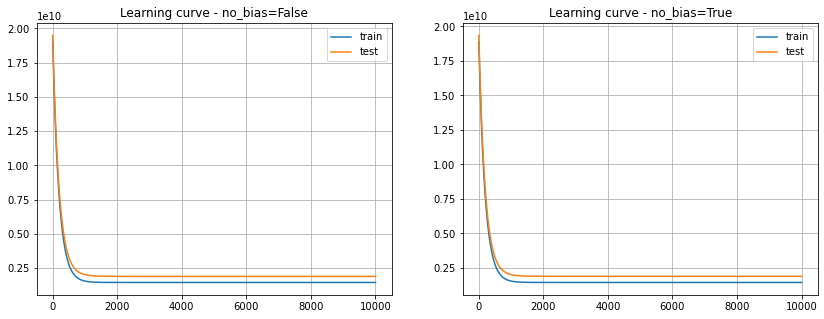

In [29]:
loss_plot(slr3.loss, slr3.val_loss, slr3_no.loss, slr3_no.val_loss)

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

### 【考察】
問題7でバイアス有無でグラフを表示したが、差の可視化が難しかったため、以下では説明変数を標準化している。

### 標準化して実験

In [30]:
# 説明変数を標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.67840248,  0.98899634],
       [-0.05839596, -0.44659417],
       [-0.79519441, -1.28321691],
       ...,
       [-0.05839596,  0.733952  ],
       [ 0.67840248,  0.06735883],
       [ 0.67840248,  0.61222629]])

In [31]:
# no_bias=False
slr4 = ScratchLinearRegression(num_iter=10001, lr=1e-3, no_bias=False, verbose=True, verbose_filter=10000)
slr4.fit(X_train_std, y_train, X_test_std, y_test)
print('loss :', slr4.loss)
print('val_loss :', slr4.val_loss)

[INFO] no_bias=False
[INFO] loop count = 0
[INFO] update_w
 [179.4173936   61.17099941  56.24067065]
[INFO] loop count = 10000
[INFO] update_w
 [180578.0793835   42677.72757583  31845.65035332]
loss : [1.93558097e+10 1.93162605e+10 1.92767984e+10 ... 8.40920990e+08
 8.40920988e+08 8.40920985e+08]
val_loss : [1.98621803e+10 1.98217654e+10 1.97814404e+10 ... 1.05192397e+09
 1.05192374e+09 1.05192350e+09]


In [32]:
# no_bias=True
slr4_no = ScratchLinearRegression(num_iter=10001, lr=1e-3, no_bias=True, verbose=True, verbose_filter=10000)
slr4_no.fit(X_train_std, y_train, X_test_std, y_test)
print('loss :', slr4_no.loss)
print('val_loss :', slr4_no.val_loss)

[INFO] loop count = 0
[INFO] update_w
 [62.42545729 57.59343594]
[INFO] loop count = 10000
[INFO] update_w
 [42677.72682571 31845.65110379]
loss : [1.93554447e+10 1.93484915e+10 1.93415602e+10 ... 1.71466140e+10
 1.71466140e+10 1.71466140e+10]
val_loss : [1.98945973e+10 1.98869144e+10 1.98792559e+10 ... 1.74267768e+10
 1.74267760e+10 1.74267752e+10]


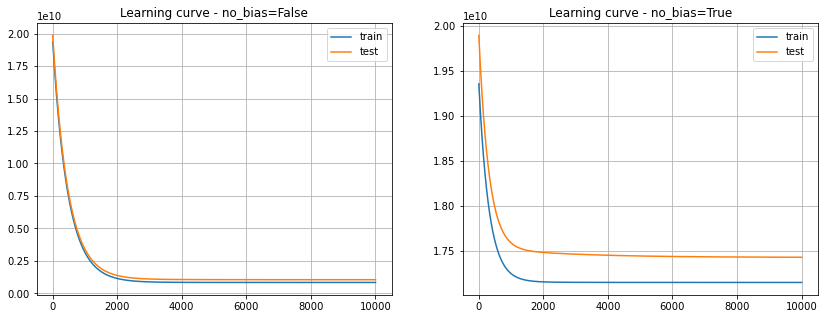

In [33]:
loss_plot(slr4.loss, slr4.val_loss, slr4_no.loss, slr4_no.val_loss)

### 【考察①】
上記より、バイアスが無いとデータへの適合が難しくなり、精度が落ちることがわかる。

この点については以降で考察する。

以下では、サンプルデータを用意して単回帰分析で様子を可視化してみる。

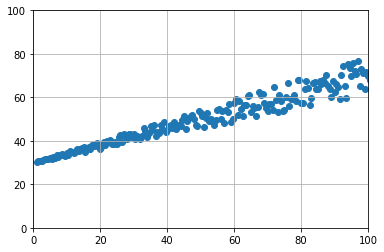

In [34]:
# サンプルデータ用意
x0 = np.arange(1, 101, 0.5)
y0 = np.random.randint(1,10,200) * x0/50 + x0*0.3 + 30

plt.scatter(x0,y0)
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)
plt.show()

In [35]:
def bias_model_test(x, y):
    # 平均
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    print('x mean :', np.mean(x))
    print('y mean :', np.mean(y))
    
    #線形回帰モデル バイアスあり
    model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
    #学習はfit
    model.fit(x[:,np.newaxis], y[:,np.newaxis])
    y1 = model.predict(x[:,np.newaxis])
    print(model.coef_)
    print(model.intercept_)

    #線形回帰モデル　バイアスなし
    model = LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)
    #学習はfit
    model.fit(x[:,np.newaxis], y[:,np.newaxis])
    y2 = model.predict(x[:,np.newaxis])
    print(model.coef_)
    print(model.intercept_)

    # グラフ化
    plt.scatter(x, y)
    plt.plot(x, y1, color='red', label='bias')
    plt.plot(x, y2, color='orange', label='no bias')
    plt.scatter(x_mean, y_mean, label='mean', color='black', marker='x', s=150)
#     plt.xlim(0,100)
#     plt.ylim(0,100)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    del model

x mean : 50.75
y mean : 50.501549999999995
[[0.40415566]]
[29.99065031]
[[0.85064475]]
0.0


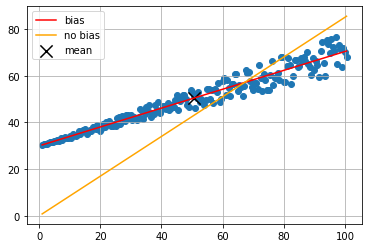

In [36]:
bias_model_test(x0, y0)

バイアスがある場合は、分布の重心（平均）を通る。

$$
\begin{align}
  y &= \theta_0 + \theta_1x_1 \\
  \theta_1 &= \frac{S_{xy}}{S_x^2} \\
  \theta_0 &= y -\theta_1x_1
\end{align}
$$

In [37]:
# 説明変数を標準化
sc = StandardScaler()
sc.fit(x0[:, np.newaxis])
x_std = sc.transform(x0[:, np.newaxis])

x mean : 0.0
y mean : 50.501549999999995
[[11.66682308]]
[50.50155]
[[11.66682308]]
0.0


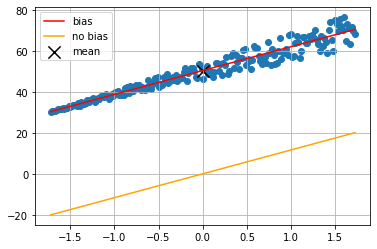

In [38]:
bias_model_test(np.squeeze(x_std), y0)

### 【考察②】
Xを標準化した場合、$S_x^2 = 1$ となる。また、$S_{xy}$ はバイアス項($\theta_0$)の有無に関わらず同じ値となる。

そのため、Xを標準化した場合の傾きは、バイアスの有無の両方において
$$
  \theta_1 = \frac{S_{xy}}{S_x^2} = \frac{S_{xy}}{1}
$$

となり、バイアス無しの回帰直線は「原点を通る、バイアス有りと同じ傾き」の直線となる。

つまり、最初に示した学習曲線の右側のグラフで、訓練データと検証データの損失間に大きな差があったのは、このバイアス分の差と考えられる。

In [39]:
# 目的変数も標準化
sc = StandardScaler()
sc.fit(y0[:,np.newaxis])
y_std = sc.transform(y0[:,np.newaxis])

x mean : 0.0
y mean : 4.973799150320702e-16
[[0.97101483]]
[4.97379915e-16]
[[0.97101483]]
0.0


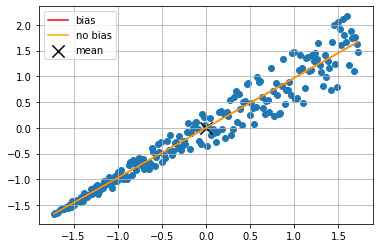

In [40]:
bias_model_test(np.squeeze(x_std), np.squeeze(y_std))

### 【考察③】
yを標準化すると、yの分布も平均0・分散1となるため、バイアス有無の回帰直線は共に原点(0,0)を通る。

考察②より傾きが等しくなることは説明ずみのため、

x,yをともに標準化すると、バイアス有無の回帰直線は等しくなる。

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

### 【考察】
特徴量の値を2乗・3条と大きくすることで、目的変数yとの誤差が大きくなるため、その誤差関数の勾配（損失関数の微分の値）も大きくなる。

そのため、学習率を大きく下げないと勾配を下りすぎてしまい正常に計算できず、最小で収束せず発散してしまう。

説明変数の事前のスケーリング処理が重要になる。

### 特徴量の二乗

In [41]:
# 特徴量の値を二乗する
X_train2, X_test2 = [i**2 for i in [X_train, X_test]]

In [42]:
num_iter = 200000
slr92 = ScratchLinearRegression(num_iter=num_iter+1, lr=1e-18, no_bias=False, verbose=True, verbose_filter=num_iter)
slr92.fit(X_train2, y_train, X_test2, y_test)

slr92_no = ScratchLinearRegression(num_iter=num_iter+1, lr=1e-18, no_bias=True, verbose=True, verbose_filter=num_iter)
slr92_no.fit(X_train2, y_train, X_test2, y_test)

[INFO] no_bias=False
[INFO] loop count = 0
[INFO] update_w
 [0.15631481 0.10732516 0.84653068]
[INFO] loop count = 200000
[INFO] update_w
 [0.15631465 0.1073176  0.1528679 ]
[INFO] loop count = 0
[INFO] update_w
 [-0.24395805 -1.02476956]
[INFO] loop count = 200000
[INFO] update_w
 [-0.243947   -0.07889313]


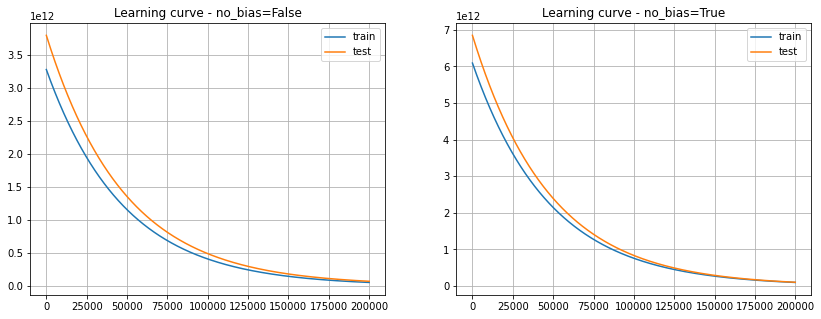

In [43]:
loss_plot(slr92.loss, slr92.val_loss, slr92_no.loss, slr92_no.val_loss)

### 特徴量の三乗

In [44]:
# 特徴量の値を二乗する
X_train3, X_test3 = [i**3 for i in [X_train, X_test]]

In [45]:
num_iter = 10000
slr93 = ScratchLinearRegression(num_iter=num_iter+1, lr=1e-23, no_bias=False, verbose=True, verbose_filter=num_iter)
slr93.fit(X_train3, y_train, X_test3, y_test)

slr93_no = ScratchLinearRegression(num_iter=num_iter+1, lr=1e-23, no_bias=True, verbose=True, verbose_filter=num_iter)
slr93_no.fit(X_train3, y_train, X_test3, y_test)

[INFO] no_bias=False
[INFO] loop count = 0
[INFO] update_w
 [ 0.78732967 -0.90686597 -0.39865398]
[INFO] loop count = 10000
[INFO] update_w
 [ 7.87329674e-01 -9.06865957e-01 -4.11106747e-04]
[INFO] loop count = 0
[INFO] update_w
 [-0.58313096 -0.44257734]
[INFO] loop count = 10000
[INFO] update_w
 [-5.83130945e-01 -4.58356124e-04]


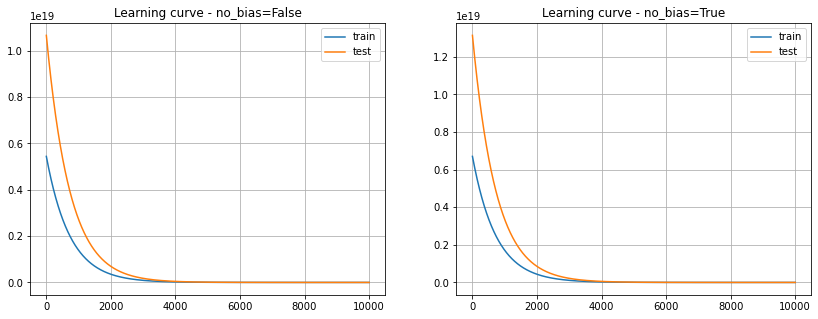

In [46]:
loss_plot(slr93.loss, slr93.val_loss, slr93_no.loss, slr93_no.val_loss)

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
\begin{align}
  \theta_j :&= 
  \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\{(h_\theta(x^{(i)}) - y^{(i)})*x_j^{(i)}\}
\end{align}
$$


以下の式から説明をはじめることができます。

$$
\begin{align}
  \theta_j :&= 
  \theta_j - \alpha\frac{\partial}{\partial{\theta_j}}J_{(\theta)} \\
\end{align}
$$

目的関数（損失関数） $J(\theta)$ は次の式です。

$$
\begin{equation*}
  J_{(\theta)} = 
  \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation*}
$$

### 【解答】

$$
\begin{equation*}
  J_{(\theta)} = 
  \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation*}
$$

上記$J_{(\theta)}$を下記のように$\theta_j$で偏微分を行う。

$$
\begin{equation*}
  \frac{\partial}{\partial{\theta_j}}J_{(\theta)}
\end{equation*}
$$

<br>
ここで、$h_\theta(x^{(i)}) - y^{(i)}$を下記のように置く。

$$
  \begin{align}
  h_\theta(x^{(i)}) - y^{(i)} 
  &= u_{(\theta)}\\
  \end{align}
$$

<br>
すると、$J_{(\theta)}$は下記と置ける。

$$
\begin{align}
  J_{(\theta)}
  &= \frac{1}{2m}\sum_{i=1}^{m}(h_0(x^{(i)}) - y^{(i)})^2 \\
  &= \frac{1}{2m}\sum_{i=1}^{m}u_{(\theta)}^2
\end{align}
$$

<br>
ここで、合成関数の微分のチェーンルールより、求める偏微分計算は下記となる。
$$
\begin{equation*}
  \frac{\partial{J_{(\theta)}}}{\partial{\theta_j}}
  = \frac{\partial{J_{(\theta)}}}{\partial{u_{(\theta)}}}
  * \frac{\partial{u_{(\theta)}}}{\partial{\theta_j}}
\end{equation*}
$$

<br>
なお、今回$h_0(x^{(i)})$は下記として、$J_{(\theta_0, \theta_1, \theta_2)}$ で考える。

$$
  \begin{align}
  h_\theta(x^{(i)})
  &= \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} \\
  \end{align}
$$

<br>
$\frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}
 {\partial{u_{(\theta_0, \theta_1, \theta_2)}}}$ は下記と計算できる。

$$
\begin{align}
  \frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}
  　　　{\partial{u_{(\theta_0, \theta_1, \theta_2)}}}
  &= \frac{\partial}{\partial{u_{(\theta_0, \theta_1, \theta_2)}}}
     \frac{1}{2m}\sum_{i=1}^{m}u_{(\theta_0, \theta_1, \theta_2)}^2 \\
  &= \frac{1}{m}\sum_{i=1}^{m}u_{(\theta_0, \theta_1, \theta_2)}
\end{align}
$$





■$j=0$のとき
$$
\begin{align}
  \frac{\partial{u_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_0}}
  &= \frac{\partial}{\partial{\theta_0}}
     \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)} \\
  &= 1
\end{align}
$$
となり、
$$
\begin{align}
  \frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_0}}
  &= \frac{1}{m}\sum_{i=1}^{m}\{u_{(\theta_0, \theta_1, \theta_2)} * 1\} \\
  &= \frac{1}{m}\sum_{i=1}^{m}\{\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\}
\end{align}
$$
となる。


■$j=1$のとき
$$
\begin{align}
  \frac{\partial{u_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_1}}
  &= \frac{\partial}{\partial{\theta_1}}
     \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)} \\
  &= x_1^{(i)}
\end{align}
$$
となり、
$$
\begin{align}
  \frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_1}}
  &= \frac{1}{m}\sum_{i=1}^{m}\{u_{(\theta_0, \theta_1, \theta_2)} * x_1^{(i)}\} \\
  &= \frac{1}{m}\sum_{i=1}^{m}\{(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)})*x_1^{(i)}\}
\end{align}
$$
となる。

■$j=2$のとき
$$
\begin{align}
  \frac{\partial{u_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_2}}
  &= \frac{\partial}{\partial{\theta_2}}
     \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)} \\
  &= x_2^{(i)}\
\end{align}
$$
となり、
$$
\begin{align}
  \frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_2}}
  &= \frac{1}{m}\sum_{i=1}^{m}\{u_{(\theta_0, \theta_1, \theta_2)} * x_2^{(i)}\} \\
  &= \frac{1}{m}\sum_{i=1}^{m}\{(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)})*x_2^{(i)}\}
\end{align}
$$
となる。

よって、$h_\theta(x^{(i)}) - y^{(i)} = u_\theta$とおいていたため、また$x_0=1$のため下記となる。

$$
\begin{align}
  \frac{\partial{J_{(\theta_0, \theta_1, \theta_2)}}}{\partial{\theta_j}}
  &= \frac{1}{m}\sum_{i=1}^{m}\{u_{(\theta_0, \theta_1, \theta_2)} * x_j^{(i)}\} \\
  &= \frac{1}{m}\sum_{i=1}^{m}\{(h_\theta(x^{(i)}) - y^{(i)})*x_j^{(i)}\}
\end{align}
$$

なお、上記は$j>2$においても同様の計算となるため、下記となる。
$$
\begin{align}
  \frac{\partial{J_{\theta}}}{\partial{\theta_j}}
&= \frac{1}{m}\sum_{i=1}^{m}\{(h_\theta(x^{(i)}) - y^{(i)})*x_j^{(i)}\}
\end{align}
$$

以上より、パラメータ$\theta$の更新式は
$$
\begin{align}
  \theta_j :&= 
  \theta_j - \alpha\frac{\partial}{\partial{\theta_j}}J_{(\theta)} \\
  &= \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\{(h_\theta(x^{(i)}) - y^{(i)})*x_j^{(i)}\}
\end{align}
$$
となる。


## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。



### 【解答】
下図の2つのグラフにおいて、左側は線形回帰、右側は非線形回帰となる。

つまり、パラメータが線形であれば必ず大域解に到達できる。

<br>
<a href="https://teratail.com/questions/171186" style="text-decoration:none">
    参考URL
</a>

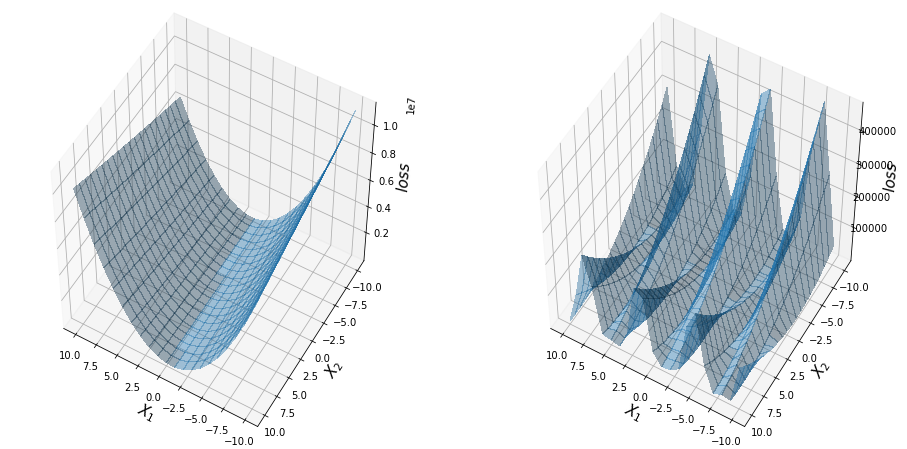

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d

xs = np.array([2.8, 2.9, 3.0, 3.1, 3.2, 3.2, 3.2, 3.3, 3.4])
ys = np.array([30, 26, 33, 31, 33, 35, 37, 36, 33])

# 近似関数 a1 x^4 + a2 x^2
def f1(a1, a2):
    return a1 * xs**4 + a2 * xs ** 2

# 近似関数 sin(a1) x^4 + a2 x^2
def f2(a1, a2):
    return np.sin(a1) * xs**4 + a2 * xs ** 2

# 2乗誤差関数
def loss(a1, a2, f):
    return ((ys - f(a1, a2)) ** 2).sum()

# 各点での関数 loss の値を計算する。
A1, A2 = np.mgrid[-10:11, -10:11]
L1 = np.array([loss(a1, a2, f1) for a1, a2 in zip(A1.ravel(), A2.ravel())])
L2 = np.array([loss(a1, a2, f2) for a1, a2 in zip(A1.ravel(), A2.ravel())])
L1, L2 = L1.reshape(A1.shape), L2.reshape(A1.shape)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
# 各軸のラベルを設定する。
ax1.set_xlabel('$X_1$', fontsize=15)
ax1.set_ylabel('$X_2$', fontsize=15)
ax1.set_zlabel('$loss$', fontsize=15)
ax2.set_xlabel('$X_1$', fontsize=15)
ax2.set_ylabel('$X_2$', fontsize=15)
ax2.set_zlabel('$loss$', fontsize=15)

# グラフを作成する。
ax1.plot_surface(A1, A2, L1, alpha=0.4, antialiased=False)
ax1.view_init(elev=50, azim=120)
ax2.plot_surface(A1, A2, L2, alpha=0.4, antialiased=False)
ax2.view_init(elev=50, azim=120)